Mengimpor library yang diperlukan

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = [15, 30]

Menampilkan gambar yang ingin dideteksi

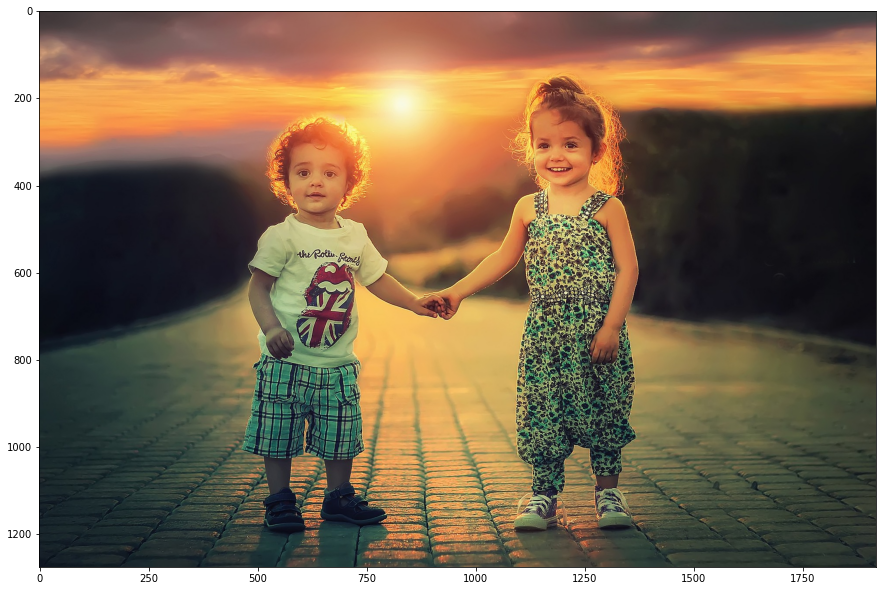

In [2]:
path='/content/children.jpg'
img = cv2.imread(path)
 
#ubah gambar menjadi RGB
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
plt.imshow(imgrgb)
plt.show()

Mengunduh file [haarcascade_frontalface_default.xml](https://github.com/opencv/opencv/blob/3.4/data/haarcascades/haarcascade_frontalface_default.xml) ke dalam storage session (yang merupakan image detector untuk mendeteksi Wajah)

In [3]:
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml

--2022-09-13 20:21:03--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-09-13 20:21:04 (30.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



Memanggil fungsi CascadeClassifier untuk mendeteksi wajah.

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
 
path=('/content/children.jpg')
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Menambahkan kotak deteksi pada area wajah

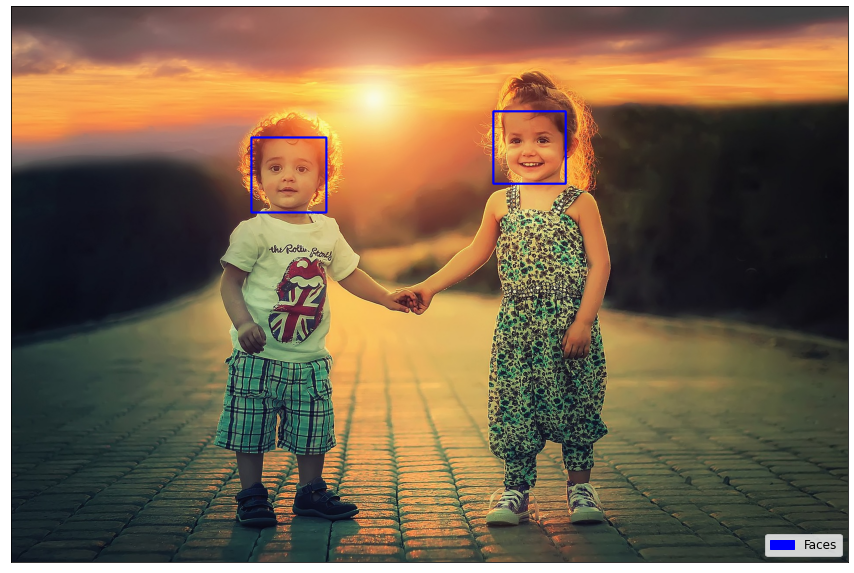

In [5]:
faces = face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:
    img = cv2.rectangle(
        img,          # objek gambar
        (x,y),        # posisi kotak
        (x+w,y+h),    # posisi kotak
        (255,0,0),    # warna kotak
        3             # lebar garis kotak
        )
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
plt.xticks([])
plt.yticks([])
 
# Membuat keterangan label
face_patch = mpatches.Patch(color='blue', label='Faces')
plt.legend(handles=[face_patch], 
           loc='lower right', fontsize=12)
 
# Plot gambar
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Mendeteksi face, smile dan eyes

In [6]:
# Face detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml
 
# Eye detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml" -O haarcascade_eye.xml
 
# Smile detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml" -O haarcascade_smile.xml

--2022-09-13 20:34:38--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2022-09-13 20:34:38 (26.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-09-13 20:34:38--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

Memanggil fungsi cascade classifier

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
 
path=('/content/children.jpg')
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Manambahkan kotak deteksi pada objek sekaligus labelnya

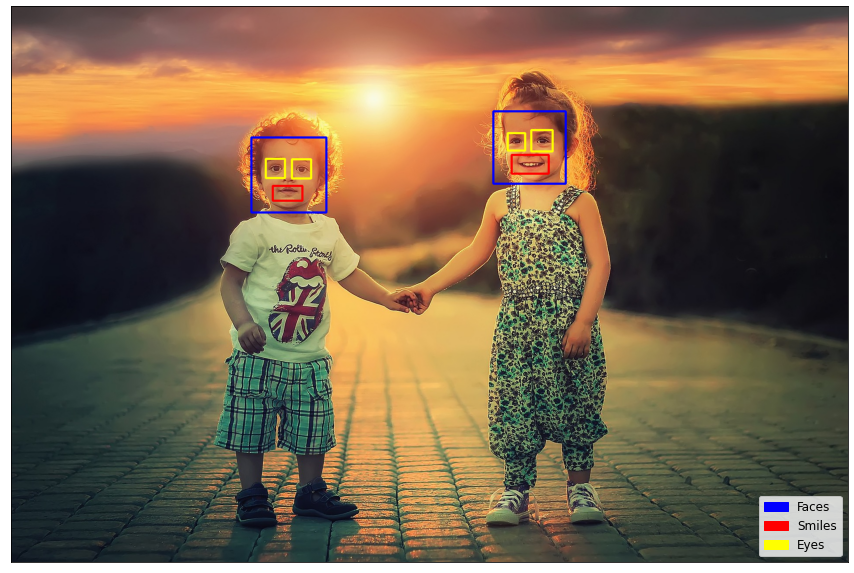

In [8]:
faces =  face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:  
    img = cv2.rectangle(
        img,          # objek gambar
        (x,y),        # posisi awal kotak (horizontal dan vertikal)
        (x+w,y+h),    # posisi kotak dengan penambahan lebar (w) dan tinggi (h)
        (255,0,0),    # warna kotak dalam RGB
        3             # lebar garis kotak
        )
 
    # Mengatur region of interest (ROI) sebagai area target
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
 
    smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 3)
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 3)
    
plt.xticks([])
plt.yticks([])
 
face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')
plt.legend(handles=[face_patch, smile_patch, eye_patch], 
           loc='lower right', fontsize=12)
 
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))